# 구매 요인 분석  
## Decision Tree

Decision Tree 모델을 통하여 온라인 경매 상품의 판매 여부를 예측하고  
소비자의 구매 결정에 각 변수가 미친 영향을 분석한다.

## 모듈 및 데이터 로드

In [1]:
# 모듈 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 로드

data = pd.read_csv('galaxy.csv')

## 데이터 특성 확인

In [4]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


carrier(이동통신사)와 color column에서 missing value들이 확인됨

In [6]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


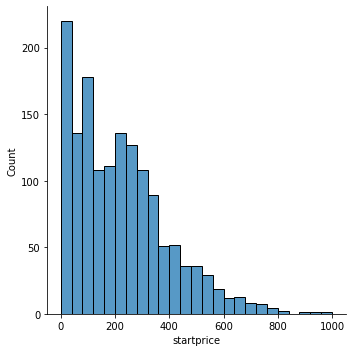

In [7]:
sns.displot(data['startprice'])

auction의 특성상 시작 가격이 높지 않은 경우가 많이 관찰된다.

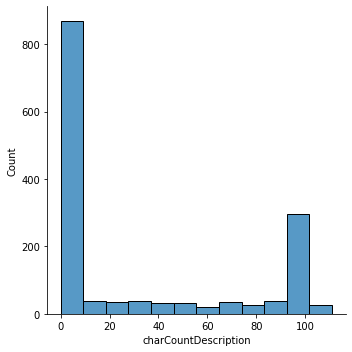

In [8]:
sns.displot(data['charCountDescription'])

상품 설명이 없는 경우가 많고 굳이 설명이 있다면 꽤 많은 분양의 정보를 담는 모습이다. 

<AxesSubplot:xlabel='productline', ylabel='startprice'>

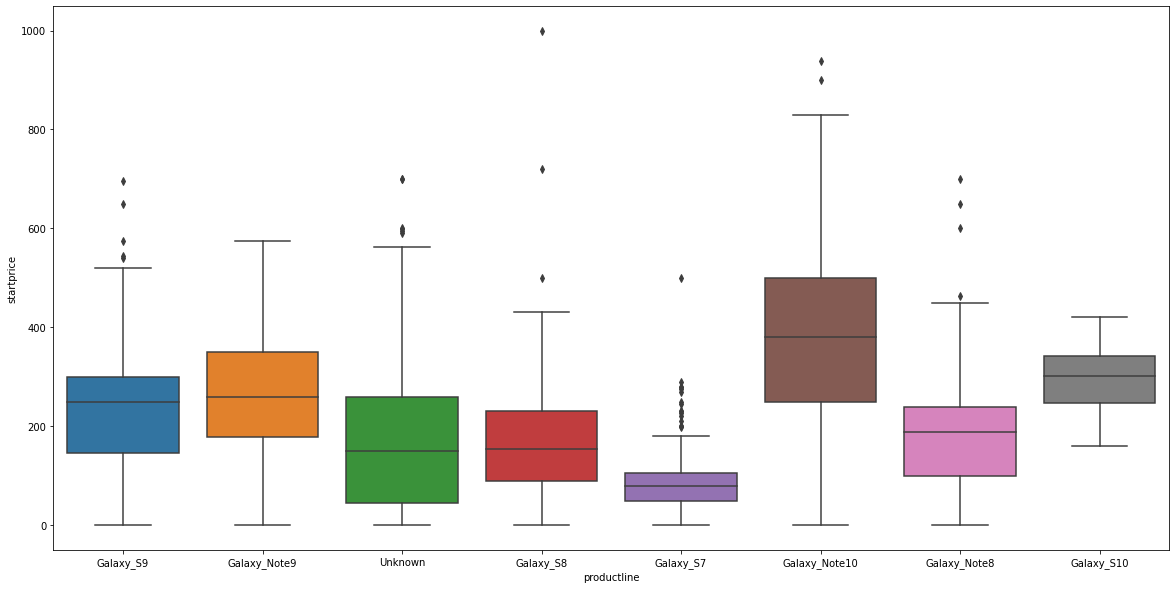

In [13]:
# outlier 확인을 위해 boxplot을 시도해 보자.

plt.figure(figsize=(20,10))
sns.boxplot(x='productline', y='startprice', data=data)